## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [12]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [13]:
df=pd.read_csv('stud.csv')

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Preparing X and Y variables

In [17]:
X=df.drop(columns=['math_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [19]:
y=df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [23]:
# Create Column Transformer with 3 types of transformers
num_feature=X.select_dtypes(exclude="object").columns
cat_feature=X.select_dtypes(include="object").columns

In [25]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_feature),
         ("StandardScaler", numeric_transformer, num_feature),        
    ]
)


In [26]:
X=preprocessor.fit_transform(X)

In [29]:
X
X.shape

(1000, 19)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_test.shape

((800, 19), (200,))

#### Create an Evaluate Function to give all metrics after model Training

In [42]:
def evaluted_model(true,predicated):
    mae=mean_absolute_error(true,predicated)
    mse=mean_squared_error(true,predicated)
    rmse=np.sqrt(mean_squared_error(true,predicated))
    r2=r2_score(true,predicated)
    return mae,mse,rmse,r2

In [49]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoostRegressor':CatBoostRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range (len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) # Train model

    #predication
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Evaluate Train and Test data set
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2_score=evaluted_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2_score=evaluted_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Taining Set")
    print("Root Mean Square error:{}".format(model_train_rmse) )
    print("Mean Absolute Square error:{}".format(model_train_mae) )
    print("Mean Square error:{}".format(model_train_mse) )
    print("R2 Square{}".format(model_train_r2_score))

    print("---------------------------------------------------")

    print("Model Performance for Test Set") 
    print("Root Mean Square error:{}".format(model_test_rmse) )
    print("Mean Absolute Square error:{}".format(model_test_mae) )
    print("Mean Square error:{}".format(model_test_mse) )
    print("R2 Square{}".format(model_test_r2_score))
    r2_list.append(model_test_r2_score)

    print('='*35)
    print('\n')


LinearRegression
Model Performance for Taining Set
Root Mean Square error:5.323050852720513
Mean Absolute Square error:4.266711846071957
Mean Square error:28.334870380648585
R2 Square0.8743172040139593
---------------------------------------------------
Model Performance for Test Set
Root Mean Square error:5.393993869732843
Mean Absolute Square error:4.214763142474852
Mean Square error:29.095169866715494
R2 Square0.8804332983749564


Lasso
Model Performance for Taining Set
Root Mean Square error:6.593815587795565
Mean Absolute Square error:5.206302661246525
Mean Square error:43.47840400585577
R2 Square0.8071462015863458
---------------------------------------------------
Model Performance for Test Set
Root Mean Square error:6.519694535667419
Mean Absolute Square error:5.157881810347763
Mean Square error:42.5064168384116
R2 Square0.8253197323627853


Ridge
Model Performance for Taining Set
Root Mean Square error:5.323324922741656
Mean Absolute Square error:4.264987823725978
Mean Square 

### Results


In [54]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
5,RandomForestRegressor,0.853406
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.842313
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783681
4,DecisionTreeRegressor,0.746485


# Linear Regression

In [57]:
Linear_model=LinearRegression(fit_intercept=True)
Linear_model.fit(X_train,y_train)
y_pred=Linear_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of Model is:{}".format(score))


Accuracy of Model is:88.04332983749565


## Plot Y_test and Y_pred

Text(0, 0.5, 'pred')

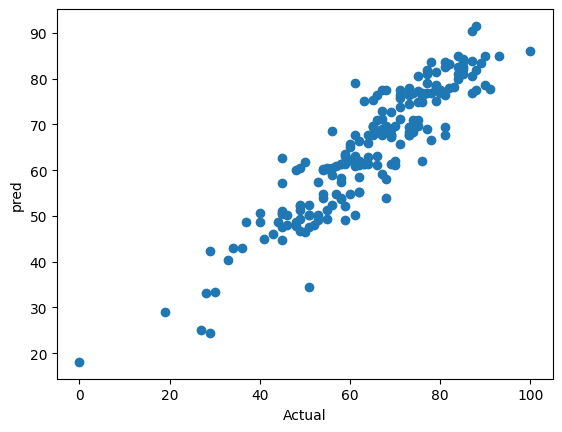

In [61]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('pred')

<Axes: xlabel='math_score'>

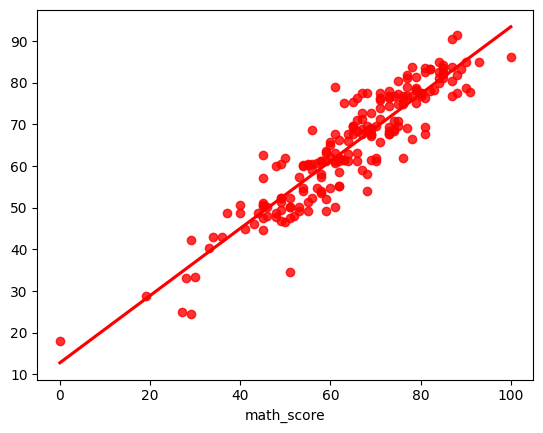

In [62]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color='red')

In [63]:
pred_diff=pd.DataFrame({'Actual_value':y_test,'Predicted':y_test_pred,'Difference':y_test-y_test_pred})
pred_diff

,Actual_value,Predicted,Difference
521,91,77.666667,13.333333
737,53,57.354610,-4.354610
740,80,77.595745,2.404255
660,74,76.945946,-2.945946
411,84,82.478261,1.521739
...,...,...,...
408,52,48.024096,3.975904
332,62,58.561446,3.438554
208,74,68.337209,5.662791
613,65,67.600000,-2.600000
